In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, stats
from math import sqrt

def read_csv(directory_name , fileName):
    '''
    Read the file from a directory given directory name and file name, we collected all the data in one directory 
    '''
    read_file = 'data/' + directory_name + '/' + fileName + '.csv'
    df = pd.read_csv(read_file)                                           
                                                     
    #df = df[ (df['time'] >= 2) & (df['time'] <= 6) ]                      
            
    return df                                                             

def get_dataFrame():
    #speed 0 for walk 1 for run
    #location 0 for left leg 1 for right leg 2 for left hand 3 for right hand
    master_df = pd.DataFrame(columns=["Timestamp", "gx", "gy", "gz", "ax", "ay", "az", "speed", "location"])
    for i in range(1):
        data = read_csv('run_leftleg' , 'run-leftleg-' + str(1))
        data["speed"] = 1
        data["location"] = 0
        master_df = master_df.append(data)

    for i in range(1):
        data = read_csv('run_rightleg' , 'run-rightleg-' + str(1))
        data["speed"] = 1
        data["location"] = 1
        master_df = master_df.append(data)

    for i in range(1):
        data = read_csv('run_lefthand' , 'run-lefthand-' + str(1))
        data["speed"] = 1
        data["location"] = 2
        master_df = master_df.append(data)

    for i in range(1):
        data = read_csv('run_righthand' , 'run-righthand-' + str(1))
        data["speed"] = 1
        data["location"] = 3
        master_df = master_df.append(data)

    for i in range(1):
        data = read_csv('walk_leftleg' , 'walk-leftleg-' + str(1))
        data["speed"] = 0
        data["location"] = 0
        master_df = master_df.append(data)

    for i in range(1):
        data = read_csv('walk_rightleg' , 'walk-rightleg-' + str(1))
        #data_feature = get_basic_feature_butterworth(data)
        data["speed"] = 0
        data["location"] = 1
        master_df = master_df.append(data)

    for i in range(1):
        data = read_csv('walk_lefthand' , 'walk-lefthand-' + str(1))
        data["speed"] = 0
        data["location"] = 2
        master_df = master_df.append(data)

    for i in range(1):
        data = read_csv('walk_righthand' , 'walk-righthand-' + str(1))
        data["speed"] = 1
        data["location"] = 3
        master_df = master_df.append(data)

    #columns = ['ax' , 'ay' , 'az' , 'aT' ]
                   
    return master_df
#
def apply_butterworth(df):
    b,a = signal.butter(3, 0.08, btype='lowpass', analog=False)
    df["filtered_ay"] = signal.filtfilt(b,a, df["ay"])
    df["filtered_ax"] = signal.filtfilt(b,a, df["ax"])
    df["filtered_az"] = signal.filtfilt(b,a, df["az"])
    b,a = signal.butter(3, [0.0008,0.06], btype='bandpass', analog=False)
    df["filtered_gy"] = signal.filtfilt(b,a, df["gy"])
    df["filtered_gx"] = signal.filtfilt(b,a, df["gx"])
    df["filtered_gz"] = signal.filtfilt(b,a, df["gz"])
    return df


In [53]:
df = get_dataFrame()


In [54]:
df = apply_butterworth(df)


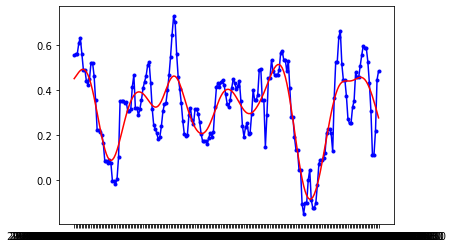

In [51]:
plt.plot(df["Timestamp"].iloc[0:200], df["ax"].iloc[8000:8200], "b.-")
plt.plot(df["Timestamp"].iloc[0:200], df["filtered_ax"].iloc[8000:8200], "r-")
plt.show()